In [33]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import tempfile
import warnings
import os

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


## 1. Importing the data

In [34]:
sales_df = pd.read_csv('./data/fact_sales.csv')
budget_df = pd.read_csv('./data/fact_budget.csv')
prod_df = pd.read_csv('./data/dim_prod.csv')
cust_df = pd.read_csv('./data/dim_cust.csv')

## 2. Exploratory Data Analysis 

We will explore the datasets to identify and understand the information with more clarity

#### 2.1 Customer Database

In [35]:
# 2. Displaying Basic Information
cust_df.info()
cust_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerKey    18484 non-null  int64 
 1   Full Name      18484 non-null  object
 2   Gender         18484 non-null  object
 3   Customer City  18484 non-null  object
dtypes: int64(1), object(3)
memory usage: 577.8+ KB


,CustomerKey,Full Name,Gender,Customer City
0,11000,Jon Yang,Male,Rockhampton
1,11001,Eugene Huang,Male,Seaford
2,11002,Ruben Torres,Male,Hobart
3,11003,Christy Zhu,Female,North Ryde
4,11004,Elizabeth Johnson,Female,Wollongong


In [36]:
# 3. Unique Counts for Each Column
unique_counts = cust_df.nunique()
print("Unique counts:", unique_counts)

Unique counts: CustomerKey      18484
Full Name        18400
Gender               2
Customer City      269
dtype: int64


In [37]:
# 4. Gender Distribution Analysis
gender_distribution = cust_df['Gender'].value_counts()
print("Gender distribution:", gender_distribution)

Gender distribution: Gender
Male      9351
Female    9133
Name: count, dtype: int64


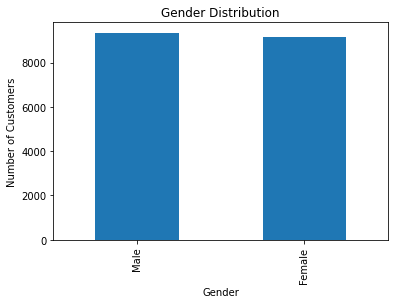

In [38]:
# Plot gender distribution
gender_distribution.plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


In [39]:
# 5. Customer City Distribution Analysis
city_distribution = cust_df['Customer City'].value_counts().head(10)
print("Top 10 Customer Cities:", city_distribution)

Top 10 Customer Cities: Customer City
London         420
Paris          386
Burien         212
Concord        212
Beaverton      210
Bellingham     210
Chula Vista    206
Berkeley       200
Burlingame     198
Bellflower     194
Name: count, dtype: int64


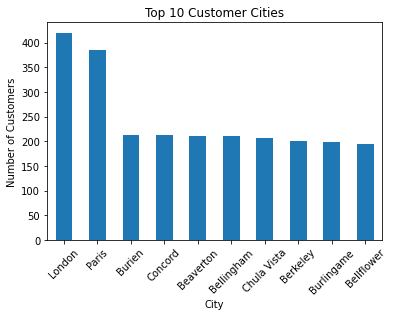

In [40]:
# Plot top 10 cities by customer count
city_distribution.plot(kind='bar', title='Top 10 Customer Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


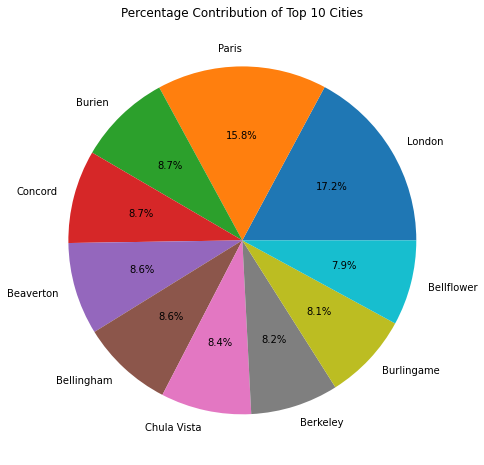

In [41]:
# Analyze percentage contribution of the top cities
city_percentage = (city_distribution / city_distribution.sum()) * 100

# Plot as a pie chart
city_percentage.plot(kind='pie', autopct='%1.1f%%', title='Percentage Contribution of Top 10 Cities', figsize=(8, 8))
plt.ylabel('')
plt.show()

#### 2.2 Sales Database: 

In [42]:
sales_df.head()

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,20220101,16942,SO46700,1000.4375
1,375,20220101,15114,SO46701,2181.5625
2,369,20220101,15116,SO46702,2443.3500
3,337,20220101,20576,SO46703,782.9900
4,370,20220101,13059,SO46704,2443.3500


In [43]:
sales_summary = sales_df.describe()
print("Summary statistics for sales data:")
print(sales_summary)

Summary statistics for sales data:
         ProductKey  OrderDateKey   CustomerKey   SalesAmount
count  56198.000000  5.619800e+04  56198.000000  56198.000000
mean     441.835635  2.023013e+07  18854.006299    394.925719
std      118.058799  2.406533e+03   5403.779586    765.659753
min      214.000000  2.022010e+07  11000.000000      2.290000
25%      363.000000  2.023041e+07  14039.000000      7.950000
50%      480.000000  2.023071e+07  18154.000000     29.990000
75%      529.000000  2.023101e+07  23431.000000     69.990000
max      606.000000  2.023123e+07  29483.000000   2443.350000


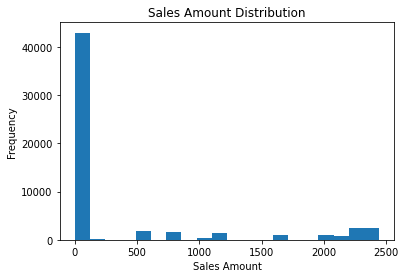

In [44]:
if 'SalesAmount' in sales_df.columns:
    sales_df['SalesAmount'].plot(kind='hist', title='Sales Amount Distribution', bins=20)
    plt.xlabel('Sales Amount')
    plt.ylabel('Frequency')
    plt.show()

In [48]:
sales_df.dtypes

ProductKey                   int64
OrderDateKey                 int64
CustomerKey                  int64
SalesOrderNumber            object
SalesAmount                float64
DateKey             datetime64[ns]
dtype: object

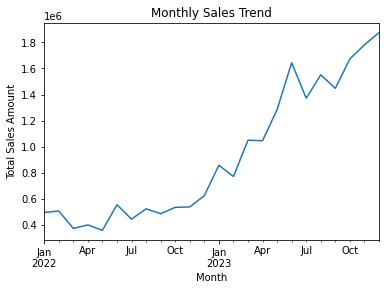

In [49]:
if 'OrderDateKey' in sales_df.columns:
    sales_df['OrderDateKey'] = pd.to_datetime(sales_df['OrderDateKey'], format='%Y%m%d')
    sales_df['Month'] = sales_df['OrderDateKey'].dt.to_period('M')
    sales_by_month = sales_df.groupby('Month')['SalesAmount'].sum()
    sales_by_month.plot(kind='line', title='Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales Amount')
    plt.show()


#### 2.3 Product Database:

In [52]:
prod_df.head()

,ProductKey,Product Name,Sub Category,Product Category,Product Status
0,1,Adjustable Race,Uncategorized,Uncategorized,Current
1,2,Bearing Ball,Uncategorized,Uncategorized,Current
2,3,BB Ball Bearing,Uncategorized,Uncategorized,Current
3,4,Headset Ball Bearings,Uncategorized,Uncategorized,Current
4,5,Blade,Uncategorized,Uncategorized,Current


In [50]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        406 non-null    int64 
 1   Product Name      406 non-null    object
 2   Sub Category      406 non-null    object
 3   Product Category  406 non-null    object
 4   Product Status    406 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.0+ KB


In [85]:
# Analyze product distribution by categories
cat_dist = prod_df[prod_df['Product Category'] != 'Uncategorized']['Product Category'].value_counts()

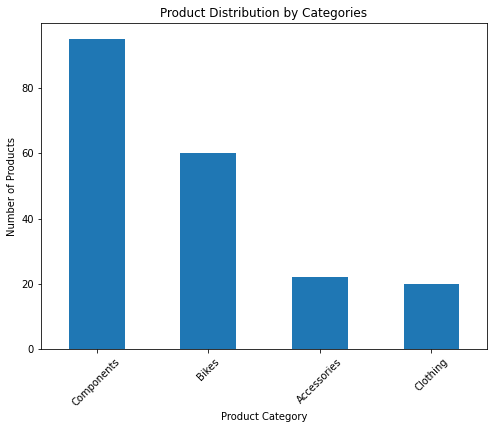

In [86]:
# Plot the distribution by categories
cat_dist.plot(kind='bar', title='Product Distribution by Categories', figsize=(8, 6))
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()